# **Slip 08 - Data Mining**


*Q1. Write a R program to get the first 10 Fibonacci numbers. [10 Marks*

In [ ]:
n <- as.integer(readline("Enter the range : "))

fib <- numeric(n)
fib[1] <- 0
fib[2] <- 1
for(i in 3:n) {
  fib[i] <- fib[i-1] + fib[i-2]
}

cat("First", n, "Fibonacci Numbers:", fib, "\n")

Enter the range : 8
First 8 Fibonacci Numbers: 0 1 1 2 3 5 8 13 


*Q2. Write a python program to implement k-means algorithm to build prediction model (Use
Credit Card Dataset CC GENERAL.csv Download from kaggle.com) [20 Marks]*

Cluster Centers:
 [[ 1.79663106  0.14353217  0.49060692]
 [-0.35857021 -0.12545349 -0.19903869]
 [ 1.14812887  4.41365163  4.82814735]]

First 5 rows with cluster labels:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

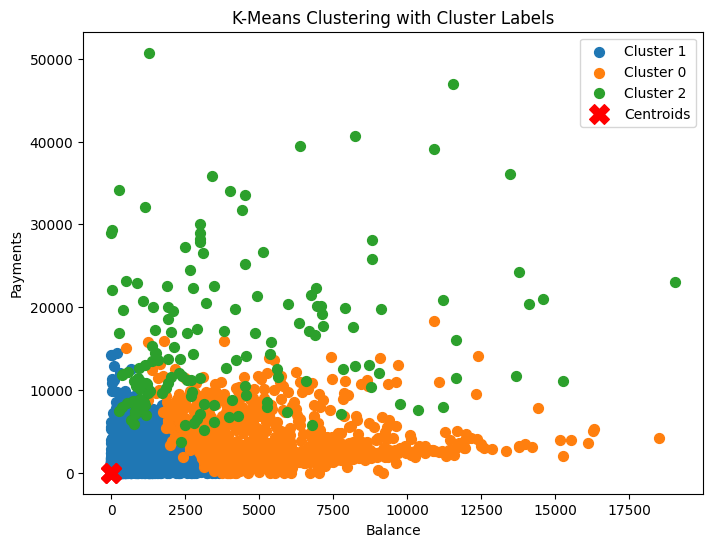

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("CC GENERAL.csv")  
X = df[['BALANCE', 'PURCHASES', 'PAYMENTS']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=1)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nFirst 5 rows with cluster labels:\n", df.head())

plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['BALANCE'], cluster_data['PAYMENTS'], label=f'Cluster {cluster}', s=50)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', color='red', s=200, label='Centroids')

plt.xlabel('Balance')
plt.ylabel('Payments')
plt.title('K-Means Clustering with Cluster Labels')
plt.legend()
plt.show()
